# Johns Hopkins University cases for the US

https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%d %b')

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [64]:
us_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
                       parse_dates=True, index_col='Province_State')
us_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Country_Region,Lat,Long_,Combined_Key,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,16,AS,ASM,16,60.0,NaN,US,-14.2710,-170.1320,"American Samoa, US",...,0,0,0,0,0,0,0,0,0,0
Guam,316,GU,GUM,316,66.0,NaN,US,13.4443,144.7937,"Guam, US",...,172,172,175,175,177,179,179,179,179,179
Northern Mariana Islands,580,MP,MNP,580,69.0,NaN,US,15.0979,145.6739,"Northern Mariana Islands, US",...,22,22,22,23,24,26,26,26,27,28
Puerto Rico,630,PR,PRI,630,72.0,NaN,US,18.2208,-66.5901,"Puerto Rico, US",...,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046
Virgin Islands,850,VI,VIR,850,78.0,NaN,US,18.3358,-64.8963,"Virgin Islands, US",...,69,69,70,70,70,71,71,71,71,71


## Drop the columns we don't need

In [65]:
dropped = us_cases.drop(['UID','iso2', 'iso3', 'code3', 'FIPS', 
                         'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
dropped.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Guam,0,0,0,0,0,0,0,0,0,0,...,172,172,175,175,177,179,179,179,179,179
Northern Mariana Islands,0,0,0,0,0,0,0,0,0,0,...,22,22,22,23,24,26,26,26,27,28
Puerto Rico,0,0,0,0,0,0,0,0,0,0,...,3718,3776,3873,3935,4023,4508,4620,4915,4985,5046
Virgin Islands,0,0,0,0,0,0,0,0,0,0,...,69,69,70,70,70,71,71,71,71,71


## Group all counties by state for sum of state

In [66]:
states_cases = dropped.groupby('Province_State').sum()
states_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,17359,17952,18630,18766,18851,19072,19387,20043,20500,20925
Alaska,0,0,0,0,0,0,0,0,0,0,...,433,459,466,486,504,512,523,535,543,562
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,19258,19936,20129,21264,22356,22886,24439,25451,26989,27678
Arkansas,0,0,0,0,0,0,0,0,0,0,...,7013,7253,7443,7818,8067,8425,8651,9101,9426,9740


## Get daily case count per state

`Use diff() method`

Axis = 1 to calculate along columns

In [67]:
daily_cases = states_cases.diff(axis=1, periods=1)
daily_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,328.0,593.0,678.0,136.0,85.0,221.0,315.0,656.0,457.0,425.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,26.0,7.0,20.0,18.0,8.0,11.0,12.0,8.0,19.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,786.0,678.0,193.0,1135.0,1092.0,530.0,1553.0,1012.0,1538.0,689.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,240.0,190.0,375.0,249.0,358.0,226.0,450.0,325.0,314.0


## Rolling seven day average of new cases

Use `rolling()` method

`Axis = 1` to average along columns

In [68]:
seven_days = daily_cases.rolling(7, axis=1).mean()
seven_days.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,463.142857,496.285714,520.571429,445.142857,402.714286,363.142857,336.571429,383.428571,364.000000,327.857143
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,3.714286,7.428571,8.285714,10.857143,13.285714,12.571429,13.428571,14.571429,12.000000,13.714286
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857,0.142857,0.142857,...,457.857143,508.428571,507.714286,628.571429,719.714286,715.571429,852.428571,884.714286,1007.571429,1078.428571
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,...,176.857143,190.142857,202.000000,234.000000,255.714286,269.571429,267.714286,298.285714,310.428571,328.142857


## % difference between two dates using `pct_change()` method

select the colums to compare

In [69]:
final_cols = seven_days.loc[:, ['5/22/20', '6/8/20']]
final_cols.head()

,5/22/20,6/8/20
Province_State,,
Alabama,328.142857,327.857143
Alaska,2.142857,13.714286
American Samoa,0.000000,0.000000
Arizona,350.714286,1078.428571
Arkansas,164.142857,328.142857


In [70]:
## Divide the latest number, by the older number to get % difference
final_cols['change'] = ((final_cols['6/8/20'] / final_cols['5/22/20']) - 1) * 100
final_cols.head()

,5/22/20,6/8/20,change
Province_State,,,
Alabama,328.142857,327.857143,-0.087070
Alaska,2.142857,13.714286,540.000000
American Samoa,0.000000,0.000000,NaN
Arizona,350.714286,1078.428571,207.494908
Arkansas,164.142857,328.142857,99.912968


In [71]:
final_cols.to_csv('data/jhu/US_state_case_change.csv')

In [76]:
final_cols2 = seven_days.loc[:, ['5/22/20', '6/8/20']]
final_cols2.head()

,5/22/20,6/8/20
Province_State,,
Alabama,328.142857,327.857143
Alaska,2.142857,13.714286
American Samoa,0.000000,0.000000
Arizona,350.714286,1078.428571
Arkansas,164.142857,328.142857


In [77]:
final_cols2 = final_cols2.pct_change(axis=1) * 100
final_cols2.head()

,5/22/20,6/8/20
Province_State,,
Alabama,NaN,-0.087070
Alaska,NaN,540.000000
American Samoa,NaN,NaN
Arizona,NaN,207.494908
Arkansas,NaN,99.912968


In [25]:
## Export this data
final_cols2.to_csv('data/jhu/US_state_case_change.csv')

## Transpose the daily cases data and reset the index so we can visualise after chaning string into datetime object

In [31]:
daily_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,328.0,593.0,678.0,136.0,85.0,221.0,315.0,656.0,457.0,425.0
Alaska,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,26.0,7.0,20.0,18.0,8.0,11.0,12.0,8.0,19.0
American Samoa,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,786.0,678.0,193.0,1135.0,1092.0,530.0,1553.0,1012.0,1538.0,689.0
Arkansas,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,236.0,240.0,190.0,375.0,249.0,358.0,226.0,450.0,325.0,314.0


In [32]:
transp = daily_cases.transpose()
transp.reset_index(inplace = True) 
transp.head()

Province_State,index,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1/22/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Convert date string to datetime objects

In [33]:
transp['index'] = pd.to_datetime(transp['index'])

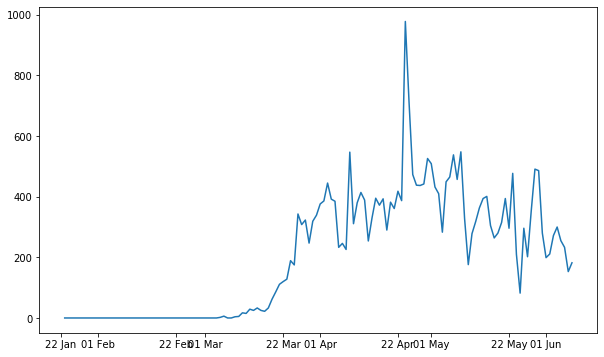

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(transp['index'], transp['Colorado'])
ax.xaxis.set_major_formatter(date_format);

In [54]:
selected_cases = transp[['index','Alaska', 'Hawaii', 'Vermont', 'Arizona', 'Montana']]
selected_cases

Province_State,index,Alaska,Hawaii,Vermont,Arizona,Montana
0,2020-01-22,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
134,2020-06-04,8.0,2.0,36.0,530.0,14.0
135,2020-06-05,11.0,9.0,1.0,1553.0,2.0
136,2020-06-06,12.0,9.0,19.0,1012.0,-1.0
137,2020-06-07,8.0,2.0,17.0,1538.0,5.0


In [55]:
selected_cases.to_csv('data/jhu/out.csv')

In [56]:
new_cases = pd.read_csv('data/jhu/out.csv', parse_dates=['index'], index_col=0, dayfirst=True,
                       usecols=[i for i in selected_cases if i != 'Province_State'])
new_cases.tail()

,Alaska,Hawaii,Vermont,Arizona,Montana
index,,,,,
2020-06-04,8.0,2.0,36.0,530.0,14.0
2020-06-05,11.0,9.0,1.0,1553.0,2.0
2020-06-06,12.0,9.0,19.0,1012.0,-1.0
2020-06-07,8.0,2.0,17.0,1538.0,5.0
2020-06-08,19.0,1.0,12.0,689.0,3.0


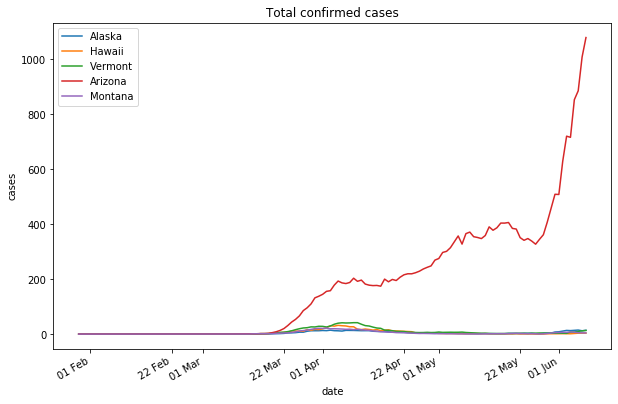

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in new_cases.items():
    ax.plot(value.rolling(7).mean(), label=column)

plt.ylabel('cases')
plt.xlabel('date')
plt.title('Total confirmed cases')
plt.xticks(rotation=30, ha='right')
ax.xaxis.set_major_formatter(date_format)

plt.legend();

## Cases as small multiples

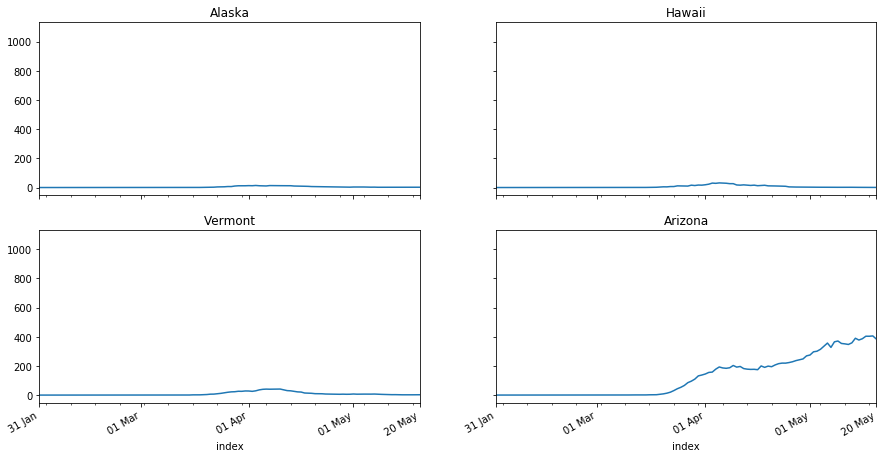

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(15,7), sharex=True, sharey=True)

for ax, column in zip(ax.flat, new_cases):
    ax.set_title(column)
    new_cases[column].rolling(7).mean().plot(ax=ax)
    
    plt.sca(ax)
    plt.xticks(rotation=30, ha='right')
    ax.xaxis.set_major_formatter(date_format)
    ax.set_xlim('2020-02-01', '2020-05-20')

plt.show()
# plt.savefig('XXXX.pdf')

## Sum all states by date

Sum each column: `df.sum(axis=0)`

Sum each row: `df.sum(axis=1)`

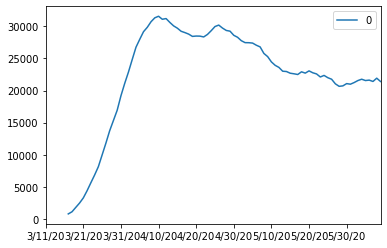

In [48]:
# Sum all states and visualise a specific range as a quick and dirty ploy
total = pd.DataFrame(daily_cases.sum(axis=0))
total.loc['3/11/20':].rolling(7).mean().plot();